In [2]:
import pandas as pd

In [4]:
# 일단 다 불러와 봄
characters=pd.read_csv("./0805data/characters.csv")

In [6]:
charactersToComics=pd.read_csv("./0805data/charactersToComics.csv")

In [7]:
marvel_characters_info=pd.read_csv("./0805data/marvel_characters_info.csv")

In [14]:
characters_stats=pd.read_csv("./0805data/charcters_stats.csv")

In [11]:
characters

,characterID,name
0,1009220,Captain America
1,1010740,Winter Soldier
2,1009471,Nick Fury
3,1009552,S.H.I.E.L.D.
4,1009228,Sharon Carter
...,...,...
1165,1011395,Talon (Fraternity of Raptors)
1166,1011196,Captain Flint
1167,1009397,Lava-Man
1168,1011113,Blue Blade


In [12]:
charactersToComics

,comicID,characterID
0,16232,1009220
1,16232,1010740
2,16248,1009220
3,16248,1009471
4,16248,1009552
...,...,...
75252,45951,1009337
75253,45951,1011428
75254,45951,1011086
75255,45951,1009546


In [13]:
marvel_characters_info

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [15]:
characters_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [17]:
# 이름으로 두 데이터프레임을 묶기
df=pd.merge(characters_stats,marvel_characters_info,how="left",on="Name")

In [22]:
df.rename(columns={"Alignment_x":"Alignment"},inplace=True)
df[["Name","Alignment_x","Intelligence","Strength","Speed","Durability","Power","Combat","Total","Publisher"]]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,NaN
1,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
2,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
3,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
4,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
624,Yellowjacket,good,88,10,12,28,12,14,164,Marvel Comics
625,Yellowjacket II,good,50,10,35,28,31,28,182,Marvel Comics
626,Ymir,good,50,100,27,100,83,28,388,Marvel Comics
627,Zatanna,good,75,10,23,28,100,56,292,DC Comics


In [25]:
df=df[["Name","Alignment","Intelligence","Strength","Speed","Durability","Power","Combat","Total","Publisher"]]

In [28]:
# 가장 총 능력치가 높은 캐릭터
df.loc[df["Total"].argmax()]

Name            Martian Manhunter
Alignment                    good
Intelligence                  100
Strength                      100
Speed                          96
Durability                    100
Power                         100
Combat                         85
Total                         581
Publisher               DC Comics
Name: 371, dtype: object

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

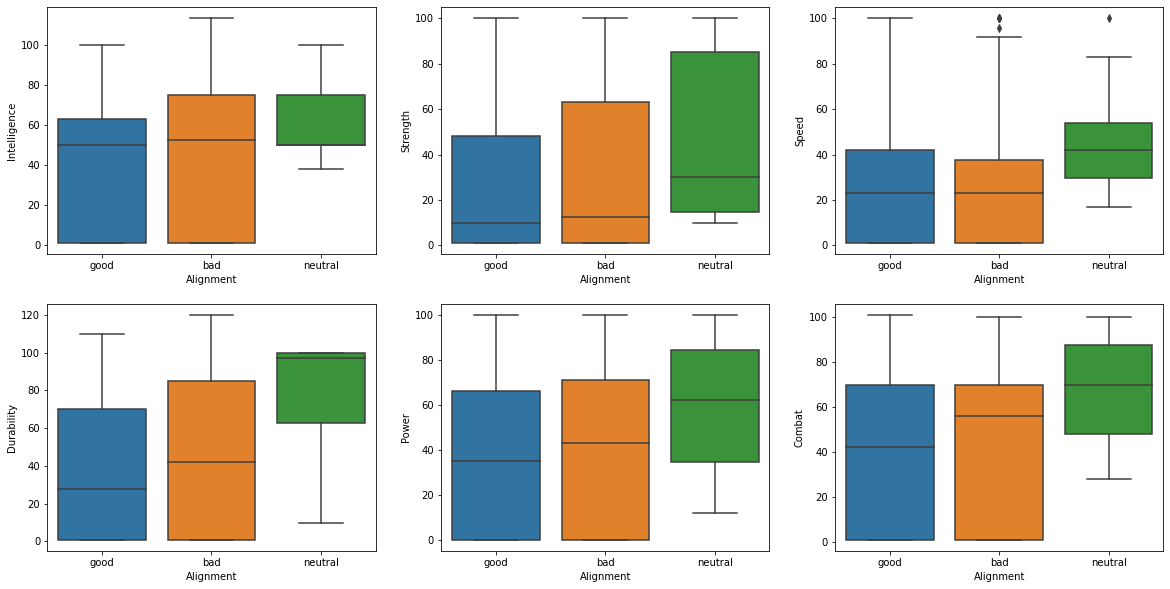

In [78]:
# 진영별 능력치 분포
plt.figure(figsize=(20,10))

count=-1
for i in df.columns:
    if count>0 and count<=6:  
        plt.subplot(2,3,count)
        sns.boxplot(x="Alignment",y=i,data=df)
    count+=1

plt.show()

<AxesSubplot:xlabel='Total', ylabel='Density'>

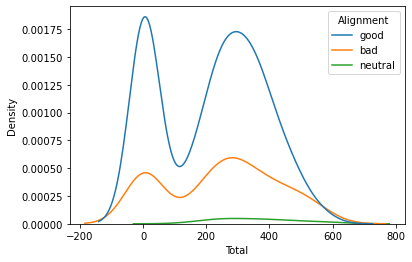

In [50]:
sns.kdeplot(data=df,x="Total",hue="Alignment")

In [94]:
# 능력치 평균이 높은 출판사
group=df["Total"].groupby(df["Publisher"])

In [106]:
mean=group.mean()
mean

Publisher
ABC Studios          166.000000
DC Comics            253.436047
Dark Horse Comics    196.875000
Hanna-Barbera          5.000000
HarperCollins          5.000000
Icon Comics          148.000000
Image Comics          70.615385
Marvel Comics        243.851003
Microsoft            425.000000
NBC - Heroes         140.526316
Shueisha             481.500000
Sony Pictures        398.000000
SyFy                 188.800000
Team Epic TV           5.000000
Universal Studios    237.000000
Wildstorm              5.000000
Name: Total, dtype: float64

In [107]:
print(mean.keys()[mean.argmax()],mean.max())

Shueisha 481.5


In [108]:
# 좋은 캐릭터가 이길까 나쁜 캐릭터가 이길까
group=df["Total"].groupby(df["Alignment"])

In [109]:
group.describe()

,count,mean,std,min,25%,50%,75%,max
Alignment,,,,,,,,
bad,166.0,245.753012,175.444904,5.0,5.0,269.5,372.75,579.0
good,449.0,215.837416,165.057141,5.0,5.0,245.0,346.00,581.0
neutral,11.0,355.363636,122.137032,196.0,259.0,366.0,412.50,553.0


In [126]:
mean=group.mean()
count=group.count()

if mean["good"]> mean["bad"]:
    newmean=(mean["neutral"]*count["neutral"]+mean["bad"]*count["bad"])/(count["neutral"]+count["bad"])
    
    print("중립 캐릭터가 나쁜 캐릭터 쪽에 가담",newmean-mean["bad"],"만큼 평균 능력치 상승")
    mean["bad"]=newmean
    
else:
    
    newmean=(mean["neutral"]*count["neutral"]+mean["good"]*count["good"])/(count["neutral"]+count["good"])
    print("중립 캐릭터가 좋은 캐릭터 쪽에 가담",newmean-mean["good"],"만큼 평균 능력치 상승")
    mean["good"]=newmean

중립 캐릭터가 좋은 캐릭터 쪽에 가담 3.336496562409195 만큼 평균 능력치 상승


In [127]:
if mean["good"]> mean["bad"]:
    print("능력치 평균",mean["good"],"대",mean["bad"],"로 좋은 캐릭터들 승리")
else:
    print("능력치 평균",mean["bad"],"대",mean["good"],"로 나쁜 캐릭터들 승리")

능력치 평균 245.75301204819277 대 219.17391304347825 로 나쁜 캐릭터들 승리
